## Module 3
# Removing Users from your Organisation

Before you can remove a user from your Organisation you need to:
* Remove all user items
* Reassign group ownership
* Remove user from all groups
* Revoke all licenses

In [1]:
# import the GIS Module
from arcgis.gis import GIS

In [2]:
# connect to GIS through a profile
gis = GIS(profile='Workshop')
print("Logged in as " + gis.properties.user.username + " to " + gis.properties.name)

Logged in as rjc_workshop to Eagle Technology


### Get information about Users

#### Search for group where all users are located

<Group title:"Workshop Users 1" owner:rjc_workshop>
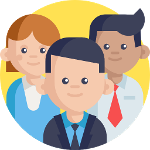

In [4]:
# create a list of the groups that these users will be added too
myGroups = gis.groups.search('a29ea40bdda0425bb8a91efd327383f8')

# pull out the first group in the list
myGroup = myGroups[0]

# display the group with icon
display (myGroup)

#### Display a list of all the usernames found

In [5]:
myMembers = myGroup.get_members()
myUsers = myMembers['users']

print ("{0} usernames found".format(len(myUsers)))
print (myUsers)

3 usernames found
['cxt_workshop', 'ixb_workshop', 'wxd_workshop']


#### Create a user 'object' for all the usernames found

In [6]:
# create empty list for all user objects
workshopUsers = []

# create a user object for all usernames gathered
for username in myUsers:
    user = gis.users.get(username=username)
    workshopUsers.append(user)
    print ("{0}, has been configured".format(username))

cxt_workshop, has been configured
ixb_workshop, has been configured
wxd_workshop, has been configured


### Exploring User Properties

In [7]:
# iterate through returned list of users and explore their content
for user in workshopUsers:
    
    userName = user.username
    groupCount = str(len(user.groups))
    folderCount = str(len(user.folders))
    itemCount = str(len(user.items()))
    
    print("{0}, Group Count ({1}), FolderCount ({2}), Item Count ({3})".format(userName, groupCount, folderCount, itemCount)) 

cxt_workshop, Group Count (1), FolderCount (0), Item Count (0)
ixb_workshop, Group Count (1), FolderCount (0), Item Count (0)
wxd_workshop, Group Count (1), FolderCount (0), Item Count (0)


### Reassign User Content

In [8]:
# define the user that content will be migrated too
myID = gis.users.me.username
display(myID)

'rjc_workshop'

#### Reassign Items

In [15]:
# loop through list of users
for user in workshopUsers:
    
    # create list of items owned by the user
    userItems = user.items()
    
    # check to see if the user has any items
    if len(userItems) != 0:
    
        #loop through this of items
        for item in userItems:

            # reassign items to another user
            item.reassign_to(myID)
            print("Item ({0}) reassigned to owner {1}".format(item['title'],myID))
            
    # if user does not have any items
    else:
        print("{0} has no items".format(user.username))

cxt_workshop has no items
ixb_workshop has no items
wxd_workshop has no items


#### Reassign Groups and Remove Users from Groups

In [16]:
# loop through list of users
for user in workshopUsers:
    
    # create list of groups user is a member of or owns
    userGroups = user.groups
    
    # check to see if the user has any items
    if len(userGroups) != 0:
    
        # loop through group list
        for group in userGroups:

            # user is owner of the group
            if group.owner == user.username:

                # reassign group to another user
                group.reassign_to(myID)
                print("Group ({0}) reassigned to owner {1}".format(group['title'],myID))

            # user is not the owner of the group
            else:

                # remove the user from the group
                group.remove_users(user.username)
                print("{0} has been removed from group {1}".format(user.username, group['title']))
                
    # if user does not have any items
    else:
        print("{0} is not a part of any groups".format(user.username))             
    

cxt_workshop has been removed from group Workshop Users 1
ixb_workshop has been removed from group Workshop Users 1
wxd_workshop has been removed from group Workshop Users 1


#### Revoke user licenses

In [17]:
# create a list of all license objects
myLicenses = gis.admin.license.all()

# loop through list of users
for user in workshopUsers:
    
    # loop through all license objects
    for l in myLicenses:
        
        # admin tools is a default entitlement of all ArcGIS Online users and we cannot revoke it
        if l.properties['listing']['title'] != 'Admin Tools for ArcGIS\u2120 Online':
        
            # revoke all license object for each user
            l.revoke(username=user.username, entitlements='*')
            
            # print statement stating that we successfully revoked this license
            print ("{0} has had been removed from {1}".format(l.properties.listing["title"], user.username))

Insights for ArcGIS has had been removed from cxt_workshop
ArcGIS Pro has had been removed from cxt_workshop
Drone2Map for ArcGIS has had been removed from cxt_workshop
GeoPlanner for ArcGIS has had been removed from cxt_workshop
AppStudio for ArcGIS has had been removed from cxt_workshop
ArcGIS Community Analyst has had been removed from cxt_workshop
Navigator for ArcGIS has had been removed from cxt_workshop
ArcGIS Business Analyst Web and Mobile Apps has had been removed from cxt_workshop
CityEngine has had been removed from cxt_workshop
Insights for ArcGIS has had been removed from ixb_workshop
ArcGIS Pro has had been removed from ixb_workshop
Drone2Map for ArcGIS has had been removed from ixb_workshop
GeoPlanner for ArcGIS has had been removed from ixb_workshop
AppStudio for ArcGIS has had been removed from ixb_workshop
ArcGIS Community Analyst has had been removed from ixb_workshop
Navigator for ArcGIS has had been removed from ixb_workshop
ArcGIS Business Analyst Web and Mobile 

### Delete Users

Finally we can loop through our list of users and remove them from our organisation by calling the .delete() function on our user objects

In [18]:
# loop through list of users
for user in workshopUsers:
    
    user.delete()
    print ("{0} has been removed from this organisation".format(user.username))

cxt_workshop has been removed from this organisation
ixb_workshop has been removed from this organisation
wxd_workshop has been removed from this organisation
